In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
tf.__version__

'2.4.1'

In [ ]:
%matplotlib inline

## Loading data

In [ ]:
def load_data():
    mnist = tf.keras.datasets.mnist
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train, x_test = x_train / 255.0, x_test/255.0
    
    return (x_train, y_train), (x_test, y_test)

In [ ]:
(x_train, y_train), (x_test, y_test) = load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

# Plot Data

In [ ]:
def plot_data(images, rows, columns):
    fig=plt.figure(figsize=(6, 6))
    for i in range(1, columns * rows + 1):
        img = images[i - 1]
        fig.add_subplot(rows, columns, i)
        plt.imshow(img, cmap="gray")
    plt.show()

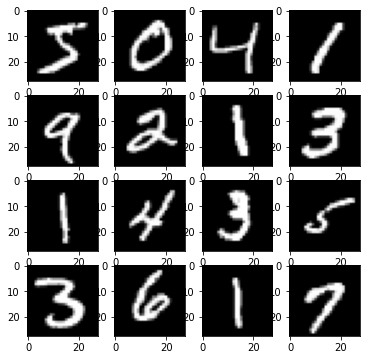

In [ ]:
plot_data(x_train[0:20], rows = 4, columns = 4) 

# Reshaping Data

In [ ]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
input_shape = (28, 28, 1)

x_train =  x_train.reshape(x_train.shape[0], *input_shape)
x_test = x_test.reshape(x_test.shape[0], *input_shape)
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

# Building Conv-Net

In [ ]:
def define_model():
    model = tf.keras.models.Sequential();
    model.add(tf.keras.layers.Conv2D(input_shape=(28, 28, 1), filters=6, kernel_size=[5, 5], activation="relu", strides=(1, 1), padding="same"))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=[5, 5], activation="relu", strides=(1, 1), padding="same"))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    
    model.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
    
    return model
    

In [ ]:
model = define_model()

In [ ]:
batched_input_shape = tf.TensorShape((None, *input_shape))

In [ ]:
batched_input_shape

TensorShape([None, 28, 28, 1])

In [ ]:
mode = model.build(input_shape = batched_input_shape)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        9664      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [ ]:
call_backs = [
    tf.keras.callbacks.EarlyStopping(patience=5, monitor="val_loss"),
    tf.keras.callbacks.TensorBoard(log_dir="./logs", histogram_freq=1, write_graph=True),
    tf.keras.callbacks.ModelCheckpoint(filepath="./checkpoints/model-{epoch:02d}-{val_loss:0.2f}", 
                                       monitor='val_loss', 
                                       verbose=2, 
                                       save_best_only=False,
                                       save_weights_only=False, 
                                       mode='auto', 
                                       save_freq='epoch')
]

In [ ]:
# Split training data to train/validation

val_x = x_train[0:5000]
val_y = y_train[0:5000]

x_train = x_train[5000 : ]
y_train = y_train[5000 : ]

In [ ]:
x_train.shape, y_train.shape

((55000, 28, 28, 1), (55000,))

In [ ]:
history = model.fit(x_train, y_train, batch_size=32, verbose=1, epochs=30, validation_data=(val_x, val_y), callbacks=call_backs)

Epoch 1/30
1719/1719 [==============================] - 59s 34ms/step - loss: 0.9247 - accuracy: 0.7381 - val_loss: 0.1343 - val_accuracy: 0.9626

Epoch 00001: saving model to ./checkpoints/model-01-0.13
INFO:tensorflow:Assets written to: ./checkpoints/model-01-0.13/assets
Epoch 2/30
1719/1719 [==============================] - 59s 34ms/step - loss: 0.1337 - accuracy: 0.9591 - val_loss: 0.0870 - val_accuracy: 0.9760

Epoch 00002: saving model to ./checkpoints/model-02-0.09
INFO:tensorflow:Assets written to: ./checkpoints/model-02-0.09/assets
Epoch 3/30
1719/1719 [==============================] - 60s 35ms/step - loss: 0.0950 - accuracy: 0.9715 - val_loss: 0.0674 - val_accuracy: 0.9790

Epoch 00003: saving model to ./checkpoints/model-03-0.07
INFO:tensorflow:Assets written to: ./checkpoints/model-03-0.07/assets
Epoch 4/30
1719/1719 [==============================] - 60s 35ms/step - loss: 0.0704 - accuracy: 0.9786 - val_loss: 0.0602 - val_accuracy: 0.9840

Epoch 00004: saving model to ./

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 14ms/step - loss: 0.0333 - accuracy: 0.9886


[0.03326195478439331, 0.9886000156402588]

In [ ]:
model.save("digit.h5")

In [ ]:
def plot_predicted_results(images, rows, columns):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, columns * rows + 1):
        img = images[i - 1]
        prediction = model.predict_classes(tf.expand_dims(img, axis=0))
        sub_plot = fig.add_subplot(rows, columns, i)
        sub_plot.set_xlabel(prediction[0], fontsize=18)
        plt.imshow(tf.squeeze(img), cmap="gray")
    plt.show()

In [ ]:
start_index = 30
end_index = 50

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


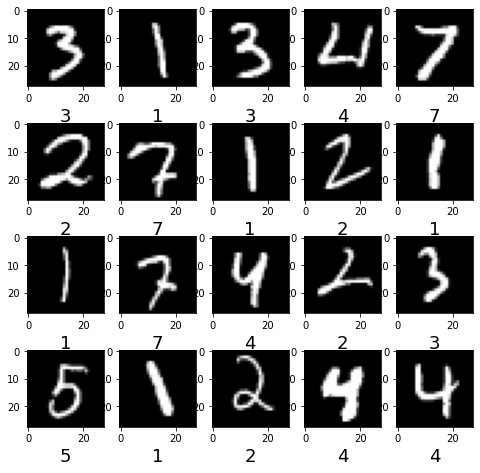

In [ ]:
plot_predicted_results(x_test[start_index:end_index], rows=4, columns=5)

In [ ]:
new_model = tf.keras.models.load_model("digit.h5")